C:\Users\rayya\AppData\Local\Temp\ipykernel_10876\3449792281.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


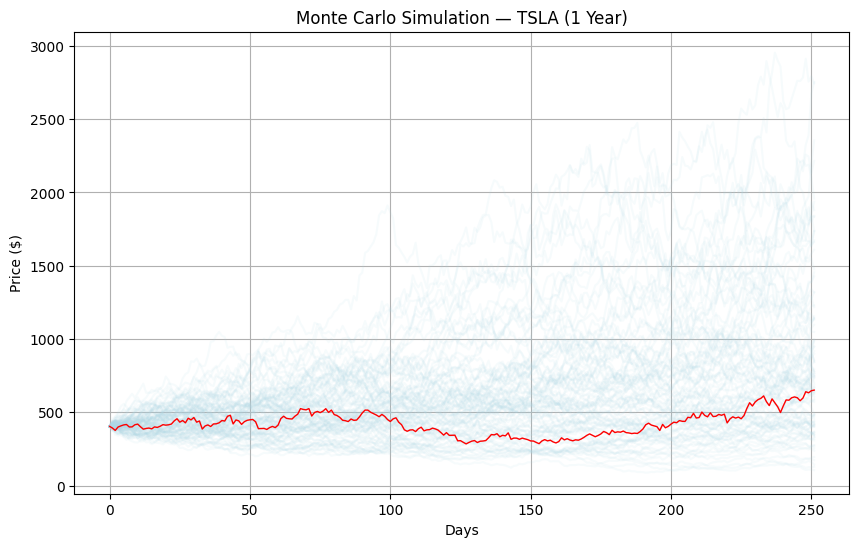

In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

ticker = "TSLA"
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")

if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

data = data["Close"].dropna()

daily_returns = data.pct_change().dropna()
mean_return = daily_returns.mean()
volatility = daily_returns.std()

days = 252
num_simulations = 100
start_price = float(data.iloc[-1])

simulations = np.zeros((days, num_simulations))

for sim in range(num_simulations):
    price_series = [start_price]
    for day in range(1, days):
        random_return = np.random.normal(mean_return, volatility)
        next_price = price_series[-1] * (1 + random_return)
        price_series.append(next_price)
    simulations[:, sim] = np.array(price_series)  # make sure it's an array

plt.figure(figsize=(10,6))
plt.plot(simulations, color="lightblue", alpha=0.1)
plt.plot(simulations[:, 0], color="red", linewidth=1)
plt.title(f"Monte Carlo Simulation — {ticker} (1 Year)")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()


